# BIFROST UNION Backend

In [1]:
import mcstasscript as ms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mcstasscript.tools.ncrystal_union import add_ncrystal_union_material

#my_configurator = ms.Configurator()
#my_configurator.set_mcrun_path("/Applications/McStas-3.4.app/Contents/Resources/mcstas/3.4/bin/")
#my_configurator.set_mcstas_path("/Applications/McStas-3.4.app/Contents/Resources/mcstas/3.4/")

"""These line are nessecary in the mcstas test enviroment for the code to compile """

my_configurator = ms.Configurator()
my_configurator.set_mcrun_path("/Users/kristinekrighaar/opt/anaconda3/envs/mcstas_test/bin/")
my_configurator.set_mcstas_path("/Users/kristinekrighaar/opt/anaconda3/envs/mcstas_test/share/mcstas/resources")

### Importing all the detector backend information

In [2]:
ana = pd.read_csv(r'backend_information_Analyzer_information.csv')
ana = ana.replace(',','.', regex=True)
ana = ana.astype(float)

det = pd.read_csv(r'backend_information_Detector_information.csv')
det = det.replace(',','.', regex=True)
det = det.astype(float)


## Making the virtual source

In [3]:
bi_end = ms.McStas_instr("BIFROST_PSC_0p3ms_magnon_1T", output_path="./BIFROST_PSC_0p3ms_magnon_v3_1T/")

##### Setting instrument parameters #####
#E0 = bi_end.add_parameter("E0")
#dE = bi_end.add_parameter("dE")

#E0.value = 5.0
#dE.value = 0.1

A4 = bi_end.add_parameter("A4", comment="Scattering angle from sample")
A4.value = 30 # 

A3 = bi_end.add_parameter("A3", comment="Sample rotation angle")
A3.value = 0 # 

bi_end.add_declare_var("int", "wedge")

std_setting = '"PSC_settings/PSC_0p3_OptimalLamBand.mcpl"' # bi_end.add_parameter("std_setting", comment="Name of .mcpl file for standard setting")


EndOfGuideToSampleLength = 0.58




The following components are found in the work_directory / input_path:
     Monochromator_flat.comp
These definitions will be used instead of the installed versions.


## Sample Environment

In [4]:

"""
Virtual source for backend, either Source simple or MCPL file (Later to be included)
"""
##### Source simple #####
#source = bi_end.add_component("source", "Source_simple", AT=[0, 0, 0], RELATIVE="ABSOLUTE")
#source.set_parameters(radius = 0.5, yheight=0.01, xwidth=0.01, focus_xw=0.005, focus_yh=0.005, dist = EndOfGuideToSampleLength, E0=E0, dE=dE)

##### Virtual MCPL source #####

virtual_source = bi_end.add_component("Vir_source", "MCPL_input", RELATIVE="ABSOLUTE")
virtual_source.filename = std_setting
virtual_source.Emin = 4.5
virtual_source.Emax = 16
virtual_source.E_smear = 0.001
virtual_source.pos_smear = 0.001
virtual_source.dir_smear = 0.05


sample_pos = bi_end.add_component("sample_pos", "Arm", AT=[0, 0, EndOfGuideToSampleLength], ROTATED=[0, 0, 0], RELATIVE="ABSOLUTE")
A3_rot = bi_end.add_component("A3_rot", "Arm", AT=[0, 0, 0], ROTATED=[0, "A3", 0], RELATIVE="sample_pos") # Sample needs to be relative to this arm
A4_rot = bi_end.add_component("A4_rot", "Arm", AT=[0, 0, 0], ROTATED=[0, "A4", 0], RELATIVE="sample_pos") # Detector tank components needs to be relative to this arm

# E_mon_before = bi_end.add_component("E_mon_before","E_monitor", AT=[0, 0, 0.5], ROTATED=[0, 0, 0], RELATIVE="Vir_source")
# E_mon_before.nE = 100
# E_mon_before.filename = '"E_mon_before.dat"'
# E_mon_before.xwidth = 0.1
# E_mon_before.yheight = 0.1
# E_mon_before.Emin = 0
# E_mon_before.Emax = 15
# E_mon_before.restore_neutron = 1

"""
Sample enviroment
"""

magnon = bi_end.add_component("Magnon", "Magnon_oI", AT=[0,0,0], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
magnon.radius = 0.005
magnon.yheight = 0.01
magnon.sigma_abs = 0
magnon.sigma_inc = 0
magnon.T = 2
magnon.a1 = 4.873
magnon.a2 = 4.873
magnon.a3 = 3.130
magnon.j = 2*0.152
magnon.jz = -2*0.028
magnon.jx = 2*0.004
magnon.jy = 2*0.004
magnon.S = 2.5
magnon.B = 1
magnon.D = -0.0182
magnon.FM = 0
magnon.e_steps_low = 50
magnon.e_steps_high = 50
magnon.target_x = "sin((A4 + 40 - A3) * M_PI / 180.0)"
magnon.target_z = "cos((A4 + 40 - A3) * M_PI / 180.0)"
magnon.target_y = 0
magnon.focus_ah = np.deg2rad(8)
magnon.focus_aw = np.deg2rad(180)

# bi_end.add_component("check", "Arm", AT=["sin((A4 + 40 - A3) * M_PI / 180.0)", 0, "cos((A4 + 40 - A3) * M_PI / 180.0)"], RELATIVE="Incoherent_sample")





init = bi_end.add_component("init", "Union_init") # This component has to be called init

phonon1.radius = 0.0025
phonon1.yheight = 0.005
phonon1.target_x = "sin((A4 + 40 - A3) * PI / 180.0)"
phonon1.target_z = "cos((A4 + 40 - A3) * PI / 180.0)"
phonon1.focus_ah = np.deg2rad(8)
phonon1.focus_aw = np.deg2rad(110)

phonon1 = bi_end.add_component("phonon1", "PhononSimple_process")
phonon1.a = 4.95
phonon1.b = 9.4
phonon1.M = 207.2
phonon1.c = 0.5
phonon1.DW = 1.0
phonon1.T = 290.0
phonon1.gap = 0.4

phonon2 = bi_end.add_component("phonon2", "PhononSimple_process")
phonon2.a = 5.5
phonon2.b = 9.4
phonon2.M = 207.2
phonon2.c = 0.3
phonon2.DW = 1.0
phonon2.T = 290.0
phonon2.gap = 0.2

E_line = bi_end.add_component("Elastic_line", "Incoherent_process")
E_line.sigma = 2*0.0082 # 2 atoms per unit cell
E_line.unit_cell_volume = 66.4

flat1 = bi_end.add_component("flat1", "Incoherent_process")
flat1.sigma = 2*0.0082 # 2 atoms per unit cell
flat1.unit_cell_volume = 66.4

flat2 = bi_end.add_component("flat2", "Incoherent_process")
flat2.sigma = 2*0.0082 # 2 atoms per unit cell
flat2.unit_cell_volume = 66.4



In [5]:
# E_mon_after = bi_end.add_component("E_mon_after","E_monitor", AT=[0, 0, 0.5], ROTATED=[0, 0, 0], RELATIVE="A3_rot")
# E_mon_after.nE = 100
# E_mon_after.filename = '"E_mon_after.dat"'
# E_mon_after.xwidth = 0.5
# E_mon_after.yheight = 0.5
# E_mon_after.Emin = 0
# E_mon_after.Emax = 15
# E_mon_after.restore_neutron = 1

#bi_end.component_help('E_monitor')
#print(A4.value)s

In [6]:
#bi_end.show_components()

## Using 'classical' McStas components

In [7]:
Detector_names = []


def make_backend_set(wedge_num, energy, energy_string, priority_offset, ang_offset, wedge_name):
    wedge_info = ana[ana["wedge_number"] == wedge_num]
    ana_en_info = wedge_info[wedge_info["Energy"] == energy]
    arm_info = np.squeeze(ana_en_info[ana_en_info["Blade_number"] == 1].to_numpy())

    wedge_info_det = det[det["Wedge number"] == wedge_num]
    det_info = np.squeeze(wedge_info_det[wedge_info_det["Energy"] == energy].to_numpy())
    
    
    ana_arm = bi_end.add_component("ana_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Arm", AT=[0, 0, arm_info[3]], ROTATED=[0, 0, 0], RELATIVE="wedge_arm"+"_"+str(ang_offset))
    
    for i in range(len(ana_en_info)):
        info = np.squeeze(ana_en_info[ana_en_info["Blade_number"] == i+1].to_numpy())
        
        crystal_name = "PG_piece_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(i)+"_"+str(wedge_name)

        PG_piece = bi_end.add_component(crystal_name,"Monochromator_flat", AT=[0, info[8]/1000, info[7]/1000], ROTATED=[-(90-info[9]), 90, 0], RELATIVE=ana_arm)
        PG_piece.set_parameters(zwidth=info[5], yheight=info[6], DM=3.355, mosaich=50, mosaicv=50)
        PG_piece.append_EXTEND("if (SCATTERED) {wedge = "+str(wedge_name)+";};")

        
    ########################################### Making the detector section #########################################
    
    det_arm = bi_end.add_component(
        "det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Arm",
        AT=[0, det_info[3], det_info[2]], ROTATED=[0, 0, 0], RELATIVE="wedge_arm"+"_"+str(ang_offset))
    
    
    # det_0_He3 = bi_end.add_component("det_close_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, np.tan(np.radians(2*info[9]-90))*(2*0.0127+0.001), -(2*0.0127+0.001)], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # det_0_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000]"'
    # det_0_He3.xwidth = 0.0127*2#-0.001
    # det_0_He3.yheight = det_info[4]
    # det_0_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_0.dat"+'"'
    # det_0_He3.set_WHEN("wedge == "+str(wedge_name))


    det_1_He3 = bi_end.add_component("det_mid_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, 0, 0], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    det_1_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000"'
    det_1_He3.xwidth = 0.0127*2#-0.001
    det_1_He3.yheight = det_info[4]
    det_1_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_1.dat"+'"'
    det_1_He3.set_WHEN("wedge == "+str(wedge_name))

    # det_2_He3 = bi_end.add_component("det_far_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name), "Monitor_nD", AT=[0, -np.tan(np.radians(2*info[9]-90))*(2*0.0127+0.001), (2*0.0127+0.001)], ROTATED=[0,0,90], RELATIVE="det_arm_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # det_2_He3.options = '"cylinder, y, bins=100, t, limits=[0.05 0.3], bins=1000]"'
    # det_2_He3.xwidth = 0.0127*2#-0.001
    # det_2_He3.yheight = det_info[4]
    # det_2_He3.filename = '"'+"signal_1Dspace_"+str(wedge_name)+"_"+str(energy_string)+"_2.dat"+'"'
    # det_2_He3.set_WHEN("wedge == "+str(wedge_name))
    
    # Detector_names.append("det_0_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # Detector_names.append("det_1_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))
    # Detector_names.append("det_2_He3_"+str(wedge_num)+"_"+str(energy_string)+"_"+str(wedge_name))

    
#print(make_backend_set(1,5.0,"5p0",5,0))

### Making a wedge

In [8]:


def make_a_wedge(wedge_type, priority_offset, ang_offset, wedge_name):
    wedge_arm = bi_end.add_component("wedge_arm"+"_"+str(ang_offset), "Arm", AT=[0, 0, 0], ROTATED=[0, ang_offset, 0], RELATIVE="A4_rot")
    for i in range(len(energy)):
        make_backend_set(wedge_type, energy[i], energy_string[i], priority_offset+i, ang_offset, wedge_name) # wedge_num, energy, energy_string, priority_offset
        
    
#print(make_a_wedge(1,1,20,1))

# Build full BIFROST Backend

In [9]:

energy = np.array([5.0])#, 3.2, 3.8, 4.4, 5.0])
energy_string = np.array([4])#, "3p2", "3p8", "4p4", "5p0"]) ARC name

ang_offset = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80]) # which angular offsets should each wedge be at (-40, -30, -20, -10, 0, 10, 20, 30, 40)

wedge_types = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3]) # What type each wegde should be 
wedge_names = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]) # what should be the name of each wedge


def Build_BIFROST(wedge_types, ang_offset, wedge_names):
    for i in range(len(wedge_types)):
        make_a_wedge(wedge_types[i], ang_offset[i], ang_offset[i], wedge_names[i])

print(Build_BIFROST(wedge_types, ang_offset, wedge_names))


None


In [10]:
#master = bi_end.add_component("master", "Union_master")
#stop = bi_end.add_component("stop", "Union_stop")

# Magnetiske punkter er ved h+l ulige, 
# s(100) er et eksempel. Din TAS kode giver A3=-72.1999 og A4 (thetaS)=27.4467.

In [11]:
A4_settings = [15,20] # 15,20

A3_settings = np.arange(-25, 76, 1, dtype='float') # -25, 76
#A3_settings = np.arange(-25, 76, 1, dtype='float') # -25, 76

print(A3_settings)

[-25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12.
 -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.
   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.]


# Running the instrument simuation

In [12]:
for i in A4_settings:
    for j in A3_settings: 
        bi_end.set_parameters(A3=j, A4=i)
        bi_end.settings()  
        data = bi_end.backengine();


INFO: Using directory: "/Users/kristinekrighaar/Documents/BIFROST_Digital_Twin/PSC_settings/Magnon_instrument_sim/BIFROST_PSC_0p3ms_magnon_v3_1T"
INFO: Regenerating c-file: BIFROST_PSC_0p3ms_magnon_1T.c
CFLAGS= -Wl,-rpath,CMD(mcpl-config --show libdir) -LCMD(mcpl-config --show libdir) -lmcpl -ICMD(mcpl-config --show includedir)
      
-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:

-----------------------------------------------------------
INFO: Recompiling: ./BIFROST_PSC_0p3ms_magnon_1T.out
./BIFROST_PSC_0p3ms_magnon_1T.c:6562:5: warning: non-void function does not return a value [-Wreturn-type]
    }
    ^
./BIFROST_PSC_0p3ms_magnon_1T.c:6595:5: warning: non-void function does not return a value [-Wreturn-type]
    }
    ^
./BIFROST_PSC_0p3ms_magnon_1T.c:18536:37: warning: format specifies type 'unsigned long' bu

In [13]:

data

[
 McStasData: det_mid_He3_1_4_0 type: 2D  I:131.154 E:7.32325 N:568.0,
 
 McStasData: det_mid_He3_2_4_1 type: 2D  I:167.714 E:8.94905 N:626.0,
 
 McStasData: det_mid_He3_3_4_2 type: 2D  I:171.506 E:9.28844 N:636.0,
 
 McStasData: det_mid_He3_1_4_3 type: 2D  I:147.569 E:8.71809 N:533.0,
 
 McStasData: det_mid_He3_2_4_4 type: 2D  I:115.445 E:7.53172 N:433.0,
 
 McStasData: det_mid_He3_3_4_5 type: 2D  I:97.7779 E:6.55348 N:410.0,
 
 McStasData: det_mid_He3_1_4_6 type: 2D  I:89.0915 E:5.78833 N:449.0,
 
 McStasData: det_mid_He3_2_4_7 type: 2D  I:76.325 E:4.96474 N:454.0,
 
 McStasData: det_mid_He3_3_4_8 type: 2D  I:81.8937 E:4.92413 N:523.0]

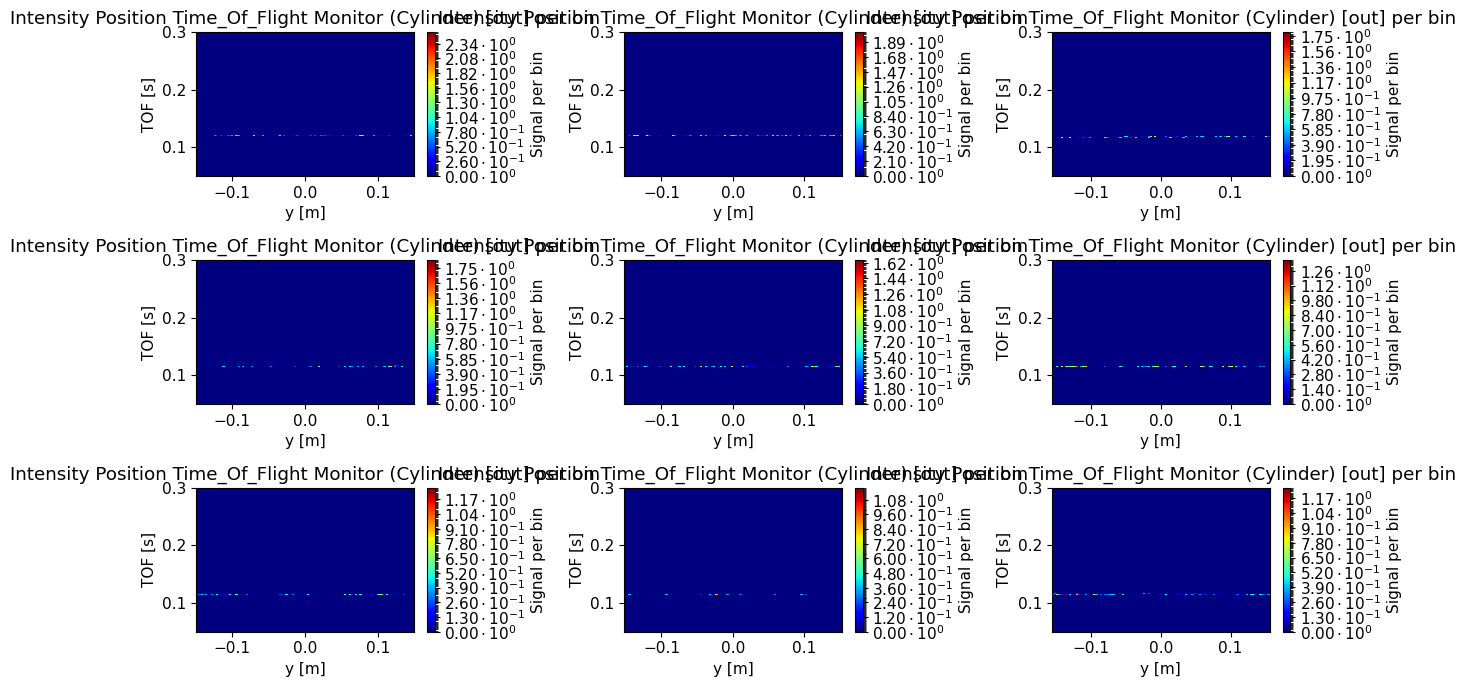

In [14]:

ms.make_sub_plot(data)

In [15]:
#A4_settings = [15,20] # 15,20
#A3_settings = np.arange(-25, 76, 1, dtype='float') # -25, 76

print(A3_settings)

[-25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12.
 -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.
   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.]


In [16]:
#for i in A4_settings:
#    for j in A3_settings:
#        bi_end.set_parameters(A3=j, A4=i)
#        bi_end.settings()  
#        data = bi_end.backengine();

In [17]:
data

[
 McStasData: det_mid_He3_1_4_0 type: 2D  I:131.154 E:7.32325 N:568.0,
 
 McStasData: det_mid_He3_2_4_1 type: 2D  I:167.714 E:8.94905 N:626.0,
 
 McStasData: det_mid_He3_3_4_2 type: 2D  I:171.506 E:9.28844 N:636.0,
 
 McStasData: det_mid_He3_1_4_3 type: 2D  I:147.569 E:8.71809 N:533.0,
 
 McStasData: det_mid_He3_2_4_4 type: 2D  I:115.445 E:7.53172 N:433.0,
 
 McStasData: det_mid_He3_3_4_5 type: 2D  I:97.7779 E:6.55348 N:410.0,
 
 McStasData: det_mid_He3_1_4_6 type: 2D  I:89.0915 E:5.78833 N:449.0,
 
 McStasData: det_mid_He3_2_4_7 type: 2D  I:76.325 E:4.96474 N:454.0,
 
 McStasData: det_mid_He3_3_4_8 type: 2D  I:81.8937 E:4.92413 N:523.0]

In [18]:
4

4